<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/3_Neural_Network_Regressions_with_Tensorflow/Neural_Network_Regression_with_Tensorflow_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A Larger Example**

In [1]:
#Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as lot


In [2]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* In the above table Charges is the dependent variable
* The rest of the columns are independent variable for our regression problem



In [3]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

* Few columns (features) seems to be of different data type. We need to create a numerical encoding. We can use one hot encoding.

In [4]:
#Lets try one hot encoding our data frame so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
#Create X and y values (Features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

#View x and y
X.head()

y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [6]:
# Create a training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [7]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [8]:
#Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 10014.3438 - mae: 10014.3438
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7608.9985 - mae: 7608.9985
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7556.1196 - mae: 7556.1196
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7619.1416 - mae: 7619.1416
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7263.4600 - mae: 7263.4600
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7890.5425 - mae: 7890.5425
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7259.3140 - mae: 7259.3140
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7350.6304 - mae: 7350.6304
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7815.3208 - mae: 7815.3208
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7476.1616 - mae: 7476.1616
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7628.5425 - mae: 7628.5425
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

In [9]:
# Check the results of the insurance models on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6395.8911 - mae: 6395.8911  


[6172.94873046875, 6172.94873046875]

In [10]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

To (try) improve our model. We will do 2 experiments.
1. Add extra layer with more hidden units
2. Train for longer
3.Your own experiment.

In [11]:
# Right now the model is not performing well. Lets try to improve it.
tf.random.set_seed(42)

#1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model. SGD Optimizer didnt give good result. So moved to Adam
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 13262.1670 - mae: 13262.1670
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 13133.0127 - mae: 13133.0127
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12864.2988 - mae: 12864.2988
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 12311.4805 - mae: 12311.4805
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 11326.6719 - mae: 11326.6719
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9926.5713 - mae: 9926.5713
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8464.0010 - mae: 8464.0010
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7552.6118 - mae: 7552.6118
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7374.4873 - mae: 7374.4873
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7344.6787 - mae: 7344.6787
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7323.9194 - mae: 7323.9194
Epoch 12/200
34/34 ━━━━━━━━━━━━━━

In [12]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3483.5974 - mae: 3483.5974  


[3417.700439453125, 3417.700439453125]

In [13]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6395.8911 - mae: 6395.8911 


[6172.94873046875, 6172.94873046875]

In [14]:
#Set random set
tf.random.set_seed(42)

#1. Create a model 3
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 13278.2627 - mae: 13278.2627
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13156.7051 - mae: 13156.7051
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12908.0410 - mae: 12908.0410
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12386.3398 - mae: 12386.3398
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11443.2666 - mae: 11443.2666
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10081.5771 - mae: 10081.5771
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8630.7891 - mae: 8630.7891
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7644.8384 - mae: 7644.8384
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7412.3091 - mae: 7412.3091
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7375.9673 - mae: 7375.9673
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7354.7822 - mae: 7354.7822
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [15]:
#EValuate our 3rd model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4979.1274 - mae: 4979.1274  


[4833.53955078125, 4833.53955078125]

In [16]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6395.8911 - mae: 6395.8911 


[6172.94873046875, 6172.94873046875]

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4780.8989 - mae: 4780.8989
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4709.6230 - mae: 4709.6230
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4633.5854 - mae: 4633.5854
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4556.1865 - mae: 4556.1865
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4473.8867 - mae: 4473.8867
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4384.7598 - mae: 4384.7598
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4297.5381 - mae: 4297.5381
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4213.3301 - mae: 4213.3301
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4131.1343 - mae: 4131.1343
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4051.9453 - mae: 4051.9453
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3973.2151 - mae: 3973.2151
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Text(0.5, 0, 'epochs')

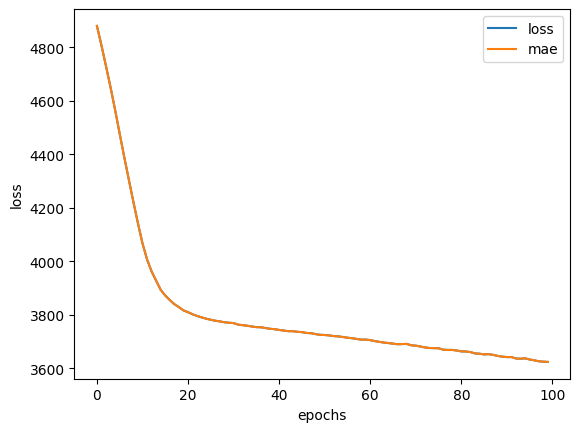

In [17]:
#Plot history (also known as a loss curve or a trianing curve)
# Assign the return value of fit to history
history = insurance_model_3.fit(X_train, y_train, epochs=100) # Assuming you want to plot history for insurance_model_3

pd.DataFrame(history.history).plot()
import matplotlib.pyplot as plt #Import matplotlib.pyplot
plt.ylabel("loss")
plt.xlabel("epochs")

** How long should you train a model for **

It depends on the problem you are working on, however many people have asked for questions before. So tensorflow has a solution. Its called the Early stopping callback https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping which is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.

### Preporcessing data (normalization and standardization)  

In terms of scaling values, neural networks tend to prefer normalization.

if you are not sure which to use, you could try both and see which perform better.

https://medium.com/towards-data-science/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [18]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

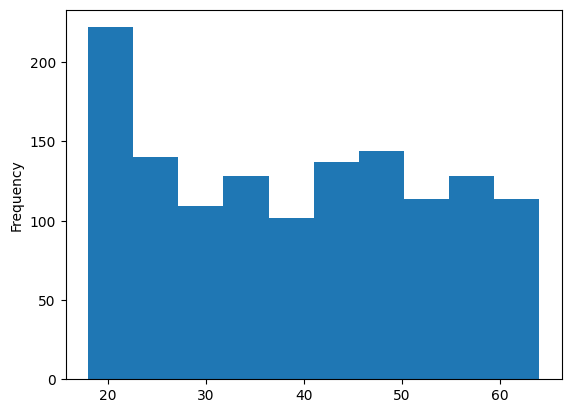

In [19]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

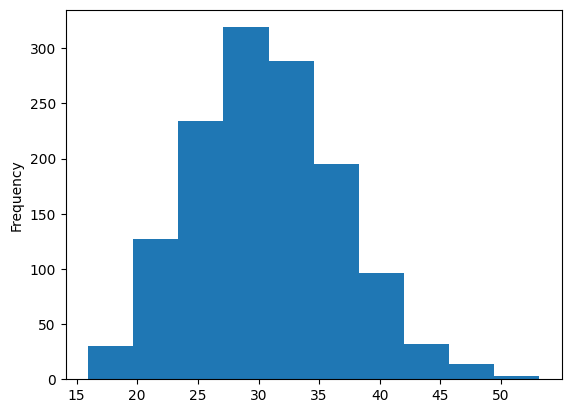

In [20]:
X["bmi"].plot(kind="hist")

In [21]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow few clasees from scikit learn.

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column transofrmer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

#Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [24]:
#What does our data look like now
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [25]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now build nueral network using it and check how it goes.
Build a NN to it on our nomalized data

In [29]:
#Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

#1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the  model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)



Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13297.6201 - mae: 13297.6201
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13291.0293 - mae: 13291.0293
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13273.8447 - mae: 13273.8447
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13236.0967 - mae: 13236.0967
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13167.4229 - mae: 13167.4229
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13056.8711 - mae: 13056.8711
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12893.3877 - mae: 12893.3877
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12666.7061 - mae: 12666.7061
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12366.9736 - mae: 12366.9736
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11986.0283 - mae: 11986.0283
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11530.3623 - mae: 11530.3623
Epoch 12/100
34/34 ━━━━━━━━━━━

In [30]:
#Evaluate insurance 4 model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3519.0024 - mae: 3519.0024  


[3432.989013671875, 3432.989013671875]

In [31]:
insurance_model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)